In [ ]:
import pandas as pd # pandas is a data frame library
import keras
from keras.models import Sequential
import matplotlib.pyplot as plt # matplot.pyplot plots data
from keras.layers import LSTM, Dense, Dropout, Masking, Flatten
import numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cardio_train.csv", sep = ";")

In [ ]:
df.shape

(70000, 13)

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
del df["id"]
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df['age'] = df['age'].map(lambda x : x // 365)
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.isnull().values.any()

False

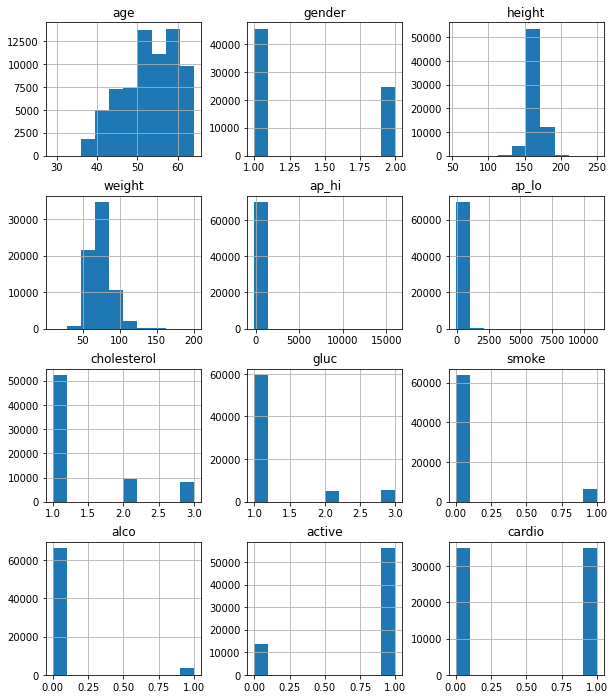

In [ ]:
df.hist(figsize=(10,12))
plt.show()

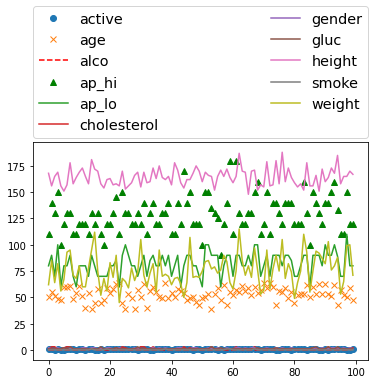

In [ ]:
dataset_plot = df
dataset_plot[['active','age','alco','ap_hi','ap_lo','cholesterol','gender','gluc','height','smoke','weight']].head(100).plot(style=['o','x','r--','g^'])
plt.legend(bbox_to_anchor=(0.,1.02,1., .102), loc=3,ncol=2, mode="expand", fontsize="x-large", borderaxespad=0.)
plt.show()

In [ ]:
# numpyMatrix=numpy.array(df.values, dtype = numpy.float64)
# X_input = numpyMatrix[:,0:11]
# X=X_input
# Y = numpyMatrix[:,8]
# As Cardio is the output that we want to predict, we will seperate it out 
X = df.drop(['cardio'], axis=1)
Y = df['cardio']

# create model
model = Sequential()

model.add(Dense(32, input_dim=11, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
tbCallBack = keras.callbacks.TensorBoard(log_dir='./diabetes/logs', histogram_freq=0, write_graph=True, write_images=True)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history = model.fit(X, Y,validation_split=0.20, epochs=10, batch_size=16,callbacks=[tbCallBack])

# evaluate the model
scores = model.evaluate(X, Y)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
3500/3500 [==============================] - 7s 2ms/step - loss: 0.8017 - accuracy: 0.6213 - val_loss: 0.6209 - val_accuracy: 0.6874
Epoch 2/10
3500/3500 [==============================] - 6s 2ms/step - loss: 0.6479 - accuracy: 0.6381 - val_loss: 0.6047 - val_accuracy: 0.6820
Epoch 3/10
3500/3500 [==============================] - 6s 2ms/step - loss: 0.6333 - accuracy: 0.6443 - val_loss: 0.6072 - val_accuracy: 0.6976
Epoch 4/10
3500/3500 [==============================] - 6s 2ms/step - loss: 0.6277 - accuracy: 0.6449 - val_loss: 0.5990 - val_accuracy: 0.6944
Epoch 5/10
3500/3500 [==============================] - 6s 2ms/step - loss: 0.6245 - accuracy: 0.6498 - val_loss: 0.6150 - val_accuracy: 0.6504
Epoch 6/10
3500/3500 [==============================] - 6s 2ms/step - loss: 0.6259 - accuracy: 0.6503 - val_loss: 0.5837 - val_accuracy: 0.6947
Epoch 7/10
3500/3500 [==============================] - 6s 2ms/step - loss: 0.6099 - accuracy: 0.6731 - val_loss: 0.5949 - val_accuracy:

In [ ]:
model.predict(X)

2188/2188 [==============================] - 2s 864us/step


array([[0.16545086],
       [0.8312273 ],
       [0.6625866 ],
       ...,
       [0.9050443 ],
       [0.6868476 ],
       [0.34331107]], dtype=float32)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


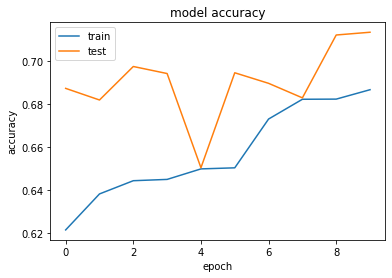

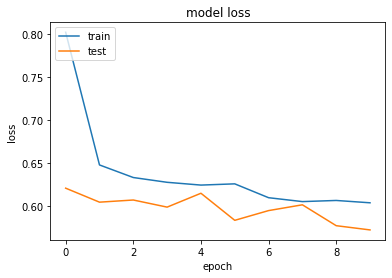

In [ ]:
# Comparing Validation and training results
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
myX_false = [[47,1,156,56.0,100,60,1,1,0,0,0]]
myX_true = [[48,2,169,82.0,150,100,1,1,0,0,1]]
matrixX=numpy.array(myX_false, dtype = numpy.float64)
X_input = matrixX[:,0:11]
model.predict(X_input)

1/1 [==============================] - 0s 55ms/step


array([[0.18475634]], dtype=float32)